# Exploratory Data Analysis

### Source
- https://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [100]:
df = pd.read_csv('forest_fires/forestfires.csv', dtype = {'X': str, 'Y': str})

In [101]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [102]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [103]:
categorical_cols = ['X', 'Y', 'month', 'day']
df[categorical_cols].describe()

,X,Y,month,day
count,517,517,517,517
unique,9,7,12,7
top,4,4,aug,sun
freq,91,203,184,95


In [104]:
numerical_cols = [col for col in df.columns.tolist() if not col in categorical_cols]
df[numerical_cols].describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Exploring

Text(0.5, 1, 'Heat Map of Fire Occurences')

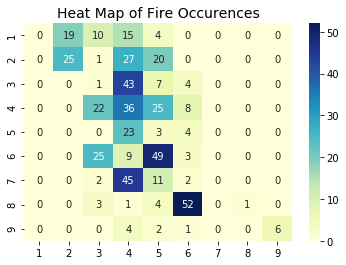

In [105]:
position = df.groupby(['X', 'Y']).count()['month'].unstack().fillna(0)
position.index.name = None
position.columns.name = None
position = pd.concat([position, pd.DataFrame({'1': np.zeros(9), '7':np.zeros(9)},index=position.index)],  axis = 1)
position = position.reindex(sorted(position.columns), axis=1).astype(int)
ax = sns.heatmap(position, annot=True, cmap="YlGnBu")
ax.set_title('Heat Map of Fire Occurences', fontsize='14')

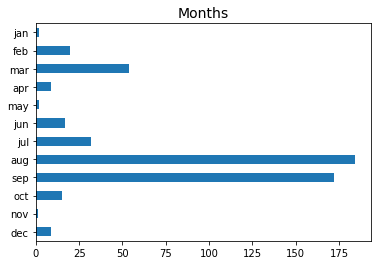

In [127]:
# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
df['month'] = pd.Categorical(df['month'], ["jan", "feb", "mar", "apr", "may", "jun",
                                           "jul", "aug", "sep", "oct", "nov", "dec"])
ax = df.month.value_counts(sort=False).sort_index(ascending=False).plot.barh()
ax.set_title("Months", fontsize=14);

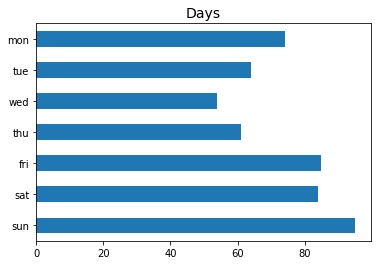

In [129]:
df['day'] = pd.Categorical(df['day'], ["mon", "tue", "wed", "thu", "fri", "sat", "sun"])
ax = df.day.value_counts(sort=False).sort_index(ascending=False).plot.barh()
ax.set_title("Days", fontsize=14);

### Forest Weather Index
Is a Canadian system for rating fire danter. It includes six components (Cortez et al).
- Fine Fuel Moisture Code (FFMC): moisture content surface litter and influences ignition and fire spread
- Initial Spread Index (ISI): Fire velocity spread
- Duff Moisture Code (DMC): moisture content of shallow organic layers
- Drought Code (DC): moisture content of deep organic layers

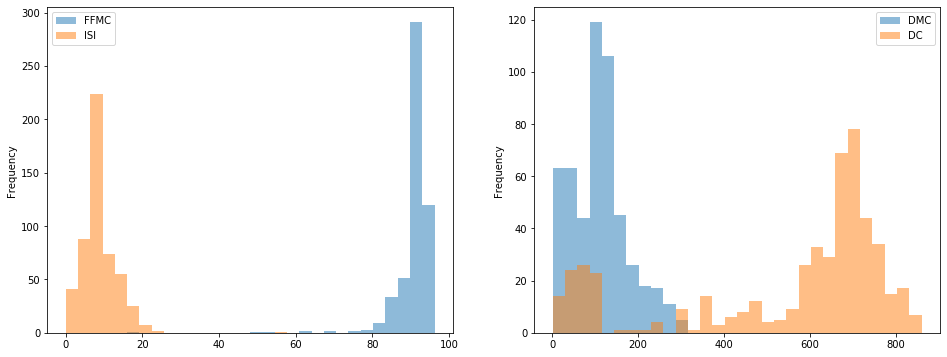

In [153]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
df[['FFMC', 'ISI']].plot.hist(ax=ax1, bins=30, alpha=0.5)
df[['DMC', 'DC']].plot.hist(ax=ax2, bins=30, alpha=0.5);